# Hierarchical DBSCAN
This notebook shows simple examples of hierarchical DBSCAN using the same three blobs example used for the hierarchical clustering. In the previous analysis, Inconsistency measure would suggested to cut the dendrogram at two clusters. The next knee and elbow plots using WSS and BSS suggested either two clusters or ten clusters. The analysis of the size of the merges starting from one cluster up to 20 clusters showed that most of the merges involved clusters containing just one data points. Thus, we opted to cut the dendrogram at ten clusters in which we had three major clusters (corresponding to the three existing blobs) and seven tiny clusters that contained only one data point. We suggested that the seven tiny clusters could be either eliminated as noise or they could be merged into the nearest bigger clusters.

## Libraries
First, we install the hdbscan library and import the other libraries used in the notebook.

In [3]:
# installation requires Anaconda
# !conda install -c conda-forge hdbscan

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import hdbscan
import seaborn as sns

from sklearn.datasets import make_blobs

# we are using the scipy implementation
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, inconsistent

%matplotlib inline

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

## Example Data
We generate some example data with three blobs. These are the same data used in the previous hierarchical clustering example.

In [5]:
random_state = 1234 ## another interesting example can be generated using the seed 36
no_clusters = 3
no_samples = 1500

X, y = make_blobs(centers=no_clusters, n_samples=no_samples, random_state=random_state)

Let's plot the blobs!

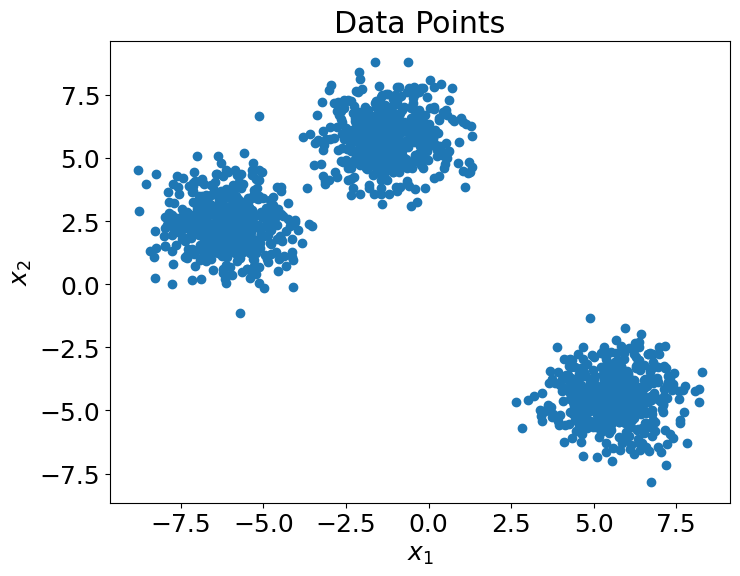

In [6]:
plt.figure(figsize=(8, 6));
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.scatter(X[:,0],X[:,1], cmap=plt.get_cmap('Pastel1'));
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Data Points");

## HDBSCAN

We now apply HDBSCAN.

In [7]:
clusterer = hdbscan.HDBSCAN()

In [8]:
clusterer.fit(X)

HDBSCAN()

We print the cluster labels. HDBSCAN identifies three clusters labeled 0, 1, and 2; -1 identified the data points that have been pruned.

In [9]:
np.unique(clusterer.labels_)

array([-1,  0,  1,  2])

Let's plot the clusters and the pruned points and the corresponding condensed tree. HDBSCAN correctly identifies the three main blobs and pruned some of the nearby points. Overall, HDBSCAN automatically returned a result very similar to the one we produced with hierarchical clustering and a more articulate post processing phase.

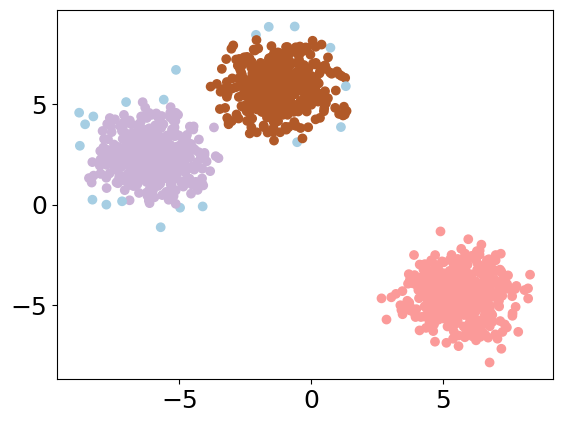

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=clusterer.labels_,cmap=plt.get_cmap('Paired'));

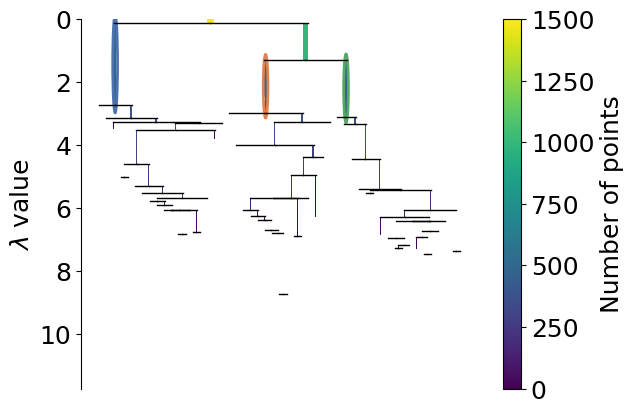

In [11]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8));

We can finally compare HDBSCAN result with what hierarchical clustering and Inconsistency measure would produce

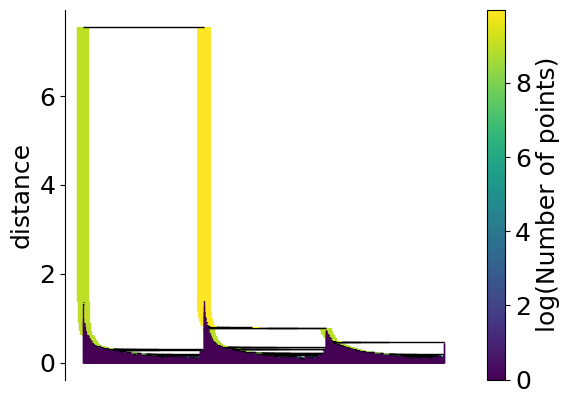

In [12]:
clusterer.single_linkage_tree_.plot();